# Predicting life expectancy using a regression model


### Introduction

The human lifespan has changed drastically over the past century, increasing from an average 47.3 years of age in 1900, to 78.8 by 2010 (Crimmins, 2015). Yet this impressive increase in the average life expectancy at birth does not reflect the inequalities in life expectancy which are seen across the socioeconomic divide. 

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website. Among all categories of health-related factors, only critical factors, such as immunization, economic, and social factor were chosen and has been observed for 193 countries from 2000 to 2015. We will use vaccination against HIV/AIDS mortality rate per 1000 live births, as well as BMI, and years of education to predict life expectancy using K-nearest neighbour  regression.


### Why these Predictors?
+ **HIV/AIDS** has been proven to shorten life expectancy by increasing the risk of other illnesses like heart disease or diabetes. This is caused by the virus weakening the immune system, making one more susceptible to illnesses and making those illnesses more likely to end in death.

+ **BMI** can be considered a proxy for health and can have a direct impact on life expectancy. As person gets further from a healthy BMI range, their life expectancy decreases.

+ **Schooling**, contrary to BMI, can increase life expectancy. It has been shown in multiple studies that people with higher levels of education tend to have longer life expectancies.


## Methods and Results
#### Our Plan

In this project, we will use regression to predict life expectancy using a linear regression model. We will analyze our data by splitting data into training and testing data, doing regression, and cross-validation to assess the function of our model. After the accuracy of the model is evaluated, we will make a prediction for the life expectancy in 2015 of new country, which a mortality due to HIV/AIDS, BMI, and year of schooling are known, but life expectancy is unknown. 


#### The Steps We Took

The first step we took for the prediction was loading our data into Jupyter. We then changed blanks in names of columns into ‘.’ . This allowed us to use the names of variables we chose in our analysis more easily. Since the dataset contains value from 2000 to 2015 for 193 countries and our goal was not to check time series change, we decided to use only data from 2015. We filtered the data using ‘Year’ variable, and then selected the variables we chose; HIV/AIDS, BMI, and schooling. Also, we checked the number of missing data in each variable and deleted those missing data. 

Afterwards, we split the data into 75% training data and 25% testing data and summarized the data to check the mean and median for our variables using summary function. Also, we created histograms of each variable so that we could check distributions of each variable using training data. 

#### NOTE: Creating new data?

We used ggpairs function to visualize the correlation between the predictors and the target variable and the distribution of each variable we chose from our training set, so that we can confirm which predictors and regression models we are going to use, creating the plot.

Following this, we preprocessed the training set by scaling and centering and made regression model, tuning our nearest neighbors. Then we did 5-fold cross-validation by testing grid of K values from and created the table showing their mean and standard error of RMSE. To visualize the result and determine our best K value, we made a line/scatter plot of the neighbours and determined the best K value. 

With our best K value, we finally created a new K nearest neighbor regression model and used it to predict the life expectancy of our test data. Also, we evaluated our model on testing set but computing the summary of regression quality. 

#### NOTE: Predicting for the new data? 


### Data Analysis
#### Loading required package and Dataset



In [1]:
# Import library

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
### Read dataset and change column names

life_data <- read_csv("https://raw.githubusercontent.com/kjokjokjo/DSCI_100_Group_Project/main/Life_Expectancy_Data.csv") 

colnames(life_data) <- make.names(colnames(life_data))

head(life_data)

Parsed with column specification:
cols(
  .default = col_double(),
  Country = col_character(),
  Status = col_character()
)

See spec(...) for full column specifications.



Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,⋯,Polio,Total_expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness_1.19_years,thinness_5.9_years,Income_composition_of_resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


Table 1. First 6 rows of the WHO dataset containing life expectancy and other variables

#### Descriptions for each Variables
+ Life_expectancy: Life Expectancy (years)
+ HIV.AIDS: Deaths per 1 000 live births due to HIV/AIDS in children aged 0-4
+ BMI: Average Body Mass Index of entire population (kg/m²)
+ Schooling: Number of years of Schooling(years)

In [5]:
### Filter the data in 2015 and Select predictors; Life Expectancy(Target), HIV/AIDS, BMI, Schooling(Predictors)

life_expectancy_select <- life_data %>%
                    filter(Year == 2015) %>% 
                    select(Life_expectancy, HIV.AIDS, BMI, Schooling)

life_expectancy_select

Life_expectancy,HIV.AIDS,BMI,Schooling
<dbl>,<dbl>,<dbl>,<dbl>
65.0,0.1,19.1,10.1
77.8,0.1,58.0,14.2
75.6,0.1,59.5,14.4
⋮,⋮,⋮,⋮
65.7,0.1,41.3,9.0
61.8,4.1,23.4,12.5
67.0,6.2,31.8,10.3


Table 2. Life expectancy dataset containing HIV.AIDS, BMI, and schooling column

#### Training Data Information 
We decided to do a complete-case analysis and so, after checking there were not a large number of missing data points for each predictor, these points were removed. 

In [6]:
### The number of missing data points for each predictor
colSums(is.na(life_expectancy_select))

Life_expectancy        HIV.AIDS             BMI       Schooling 
              0               0               2              10

In [7]:
### Delete missing data
life_expectancy_naomit <- na.omit(life_expectancy_select)

Using Pearson's r, we found that HIV/AIDS, Schooling and BMI all have a high correlation coefficient with life expectancy (between ± 0.50 and ± 1). As such we will use them all to predict the life expectancy.

In [10]:
### Checking the correlation coefficients of each predictor

# Pearson correlation between Life expectancy and HIV/AIDS
cor(life_expectancy_naomit$Life_expectancy, life_expectancy_naomit$HIV.AIDS)
# Pearson correlation between Life_expectancy and BMI
cor(life_expectancy_naomit$Life_expectancy, life_expectancy_naomit$BMI)
# # Pearson correlation between Life_expectancy and Schooling
cor(life_expectancy_naomit$Life_expectancy, life_expectancy_naomit$Schooling)


[1] -0.6089023

[1] 0.5054744

[1] 0.8154211

We split the data into 75% training data and 25% testing data (Table 3), and created histograms of each variable (Figure 1) so that we could check the distribution of each predictor. 

In [22]:
### Split dataset into training and test set

set.seed(3546)
life_expectancy_split <-initial_split(life_expectancy_naomit, prop = 0.75, strata = "Life_expectancy")
life_expectancy_training <- training(life_expectancy_split)
life_expectancy_testing <- testing(life_expectancy_split)
life_expectancy_training

Life_expectancy,HIV.AIDS,BMI,Schooling
<dbl>,<dbl>,<dbl>,<dbl>
65.0,0.1,19.1,10.1
77.8,0.1,58.0,14.2
52.4,1.9,23.3,11.4
⋮,⋮,⋮,⋮
76.0,0.1,17.5,12.6
65.7,0.1,41.3,9.0
61.8,4.1,23.4,12.5


Table 3. Training data from WHO life expectancy data.

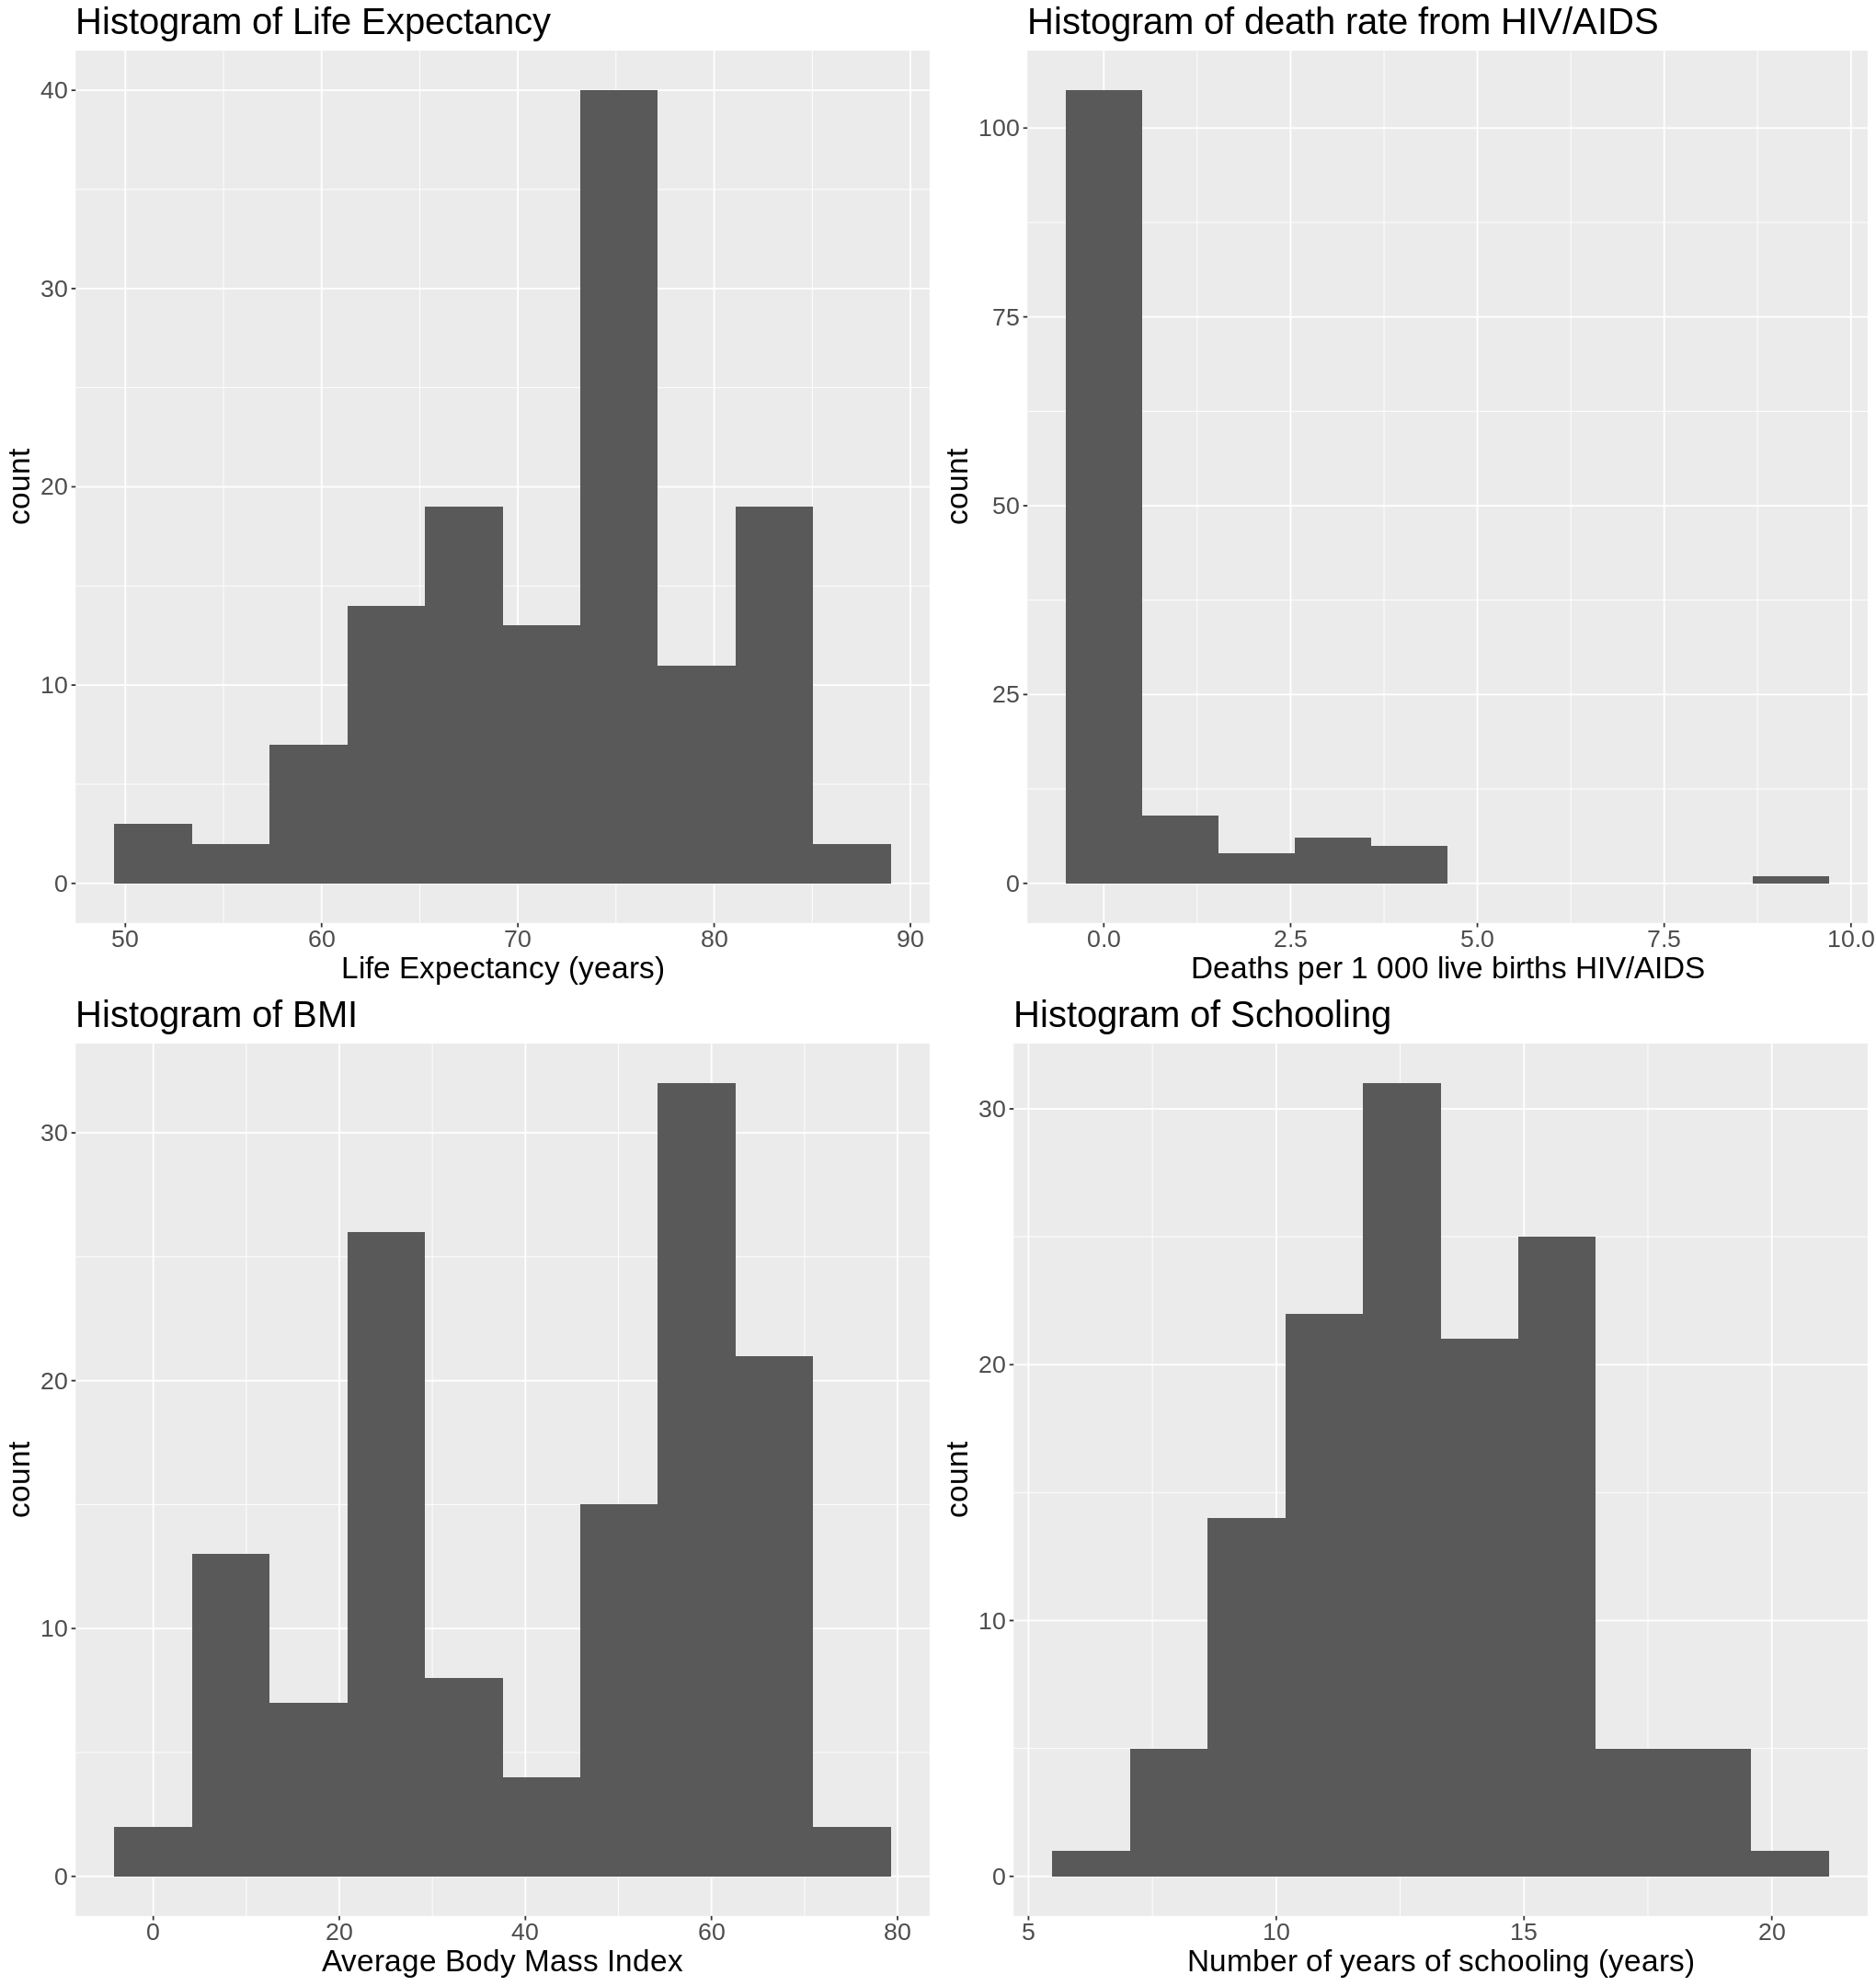

In [23]:
### Distribution of each predictor

library(cowplot)
options(repr.plot.width = 17, repr.plot.height = 18)

life_expectancy_hist <- ggplot(life_expectancy_training, aes(x = Life_expectancy)) +
    geom_histogram(bins = 10) +
    xlab("Life Expectancy (years)") +
    ggtitle("Histogram of Life Expectancy") +
    theme(text = element_text(size = 20))

hiv_aids_hist <- ggplot(life_expectancy_training, aes(x = HIV.AIDS)) +
    geom_histogram(bins = 10) +
    xlab("Deaths per 1 000 live births HIV/AIDS") +
    ggtitle("Histogram of death rate from HIV/AIDS") +
    theme(text = element_text(size = 20))

bmi_hist <- ggplot(life_expectancy_training, aes(x = BMI)) +
    geom_histogram(bins = 10) +
    xlab("Average Body Mass Index") +
    ggtitle("Histogram of BMI") +
    theme(text = element_text(size = 20))

schooling_hist <- ggplot(life_expectancy_training, aes(x = Schooling)) +
    geom_histogram(bins = 10) +
    xlab("Number of years of schooling (years)") +
    ggtitle("Histogram of Schooling") +
    theme(text = element_text(size = 20))

plot_grid(life_expectancy_hist, hiv_aids_hist, bmi_hist, schooling_hist)

Figure 1. Histograms of the distributions of each predictor

#### Correlation between the predictors and the target variable

We used the ‘ggpairs()’ function to visualize the correlation between the predictors and the target variable and the distribution of each variable from our training set (Figure 1).
Our exploratory data analysis indicated that the correlation coefficients of HIV.AIDS, Schooling, and BMI were all between ± 0.50 and ± 1, -0.609 0.815,and 0.505 respectively, leading to all three being included as predictors.  Figure 2 shows a weaker correlation between BMI and Life Expectancy which should be considered when evaluating the results.  As there does not appear to be a strong linear relationship between the predictors and the target variable we decided to use K-nearest neighbour regression for our prediction instead of linear regression.


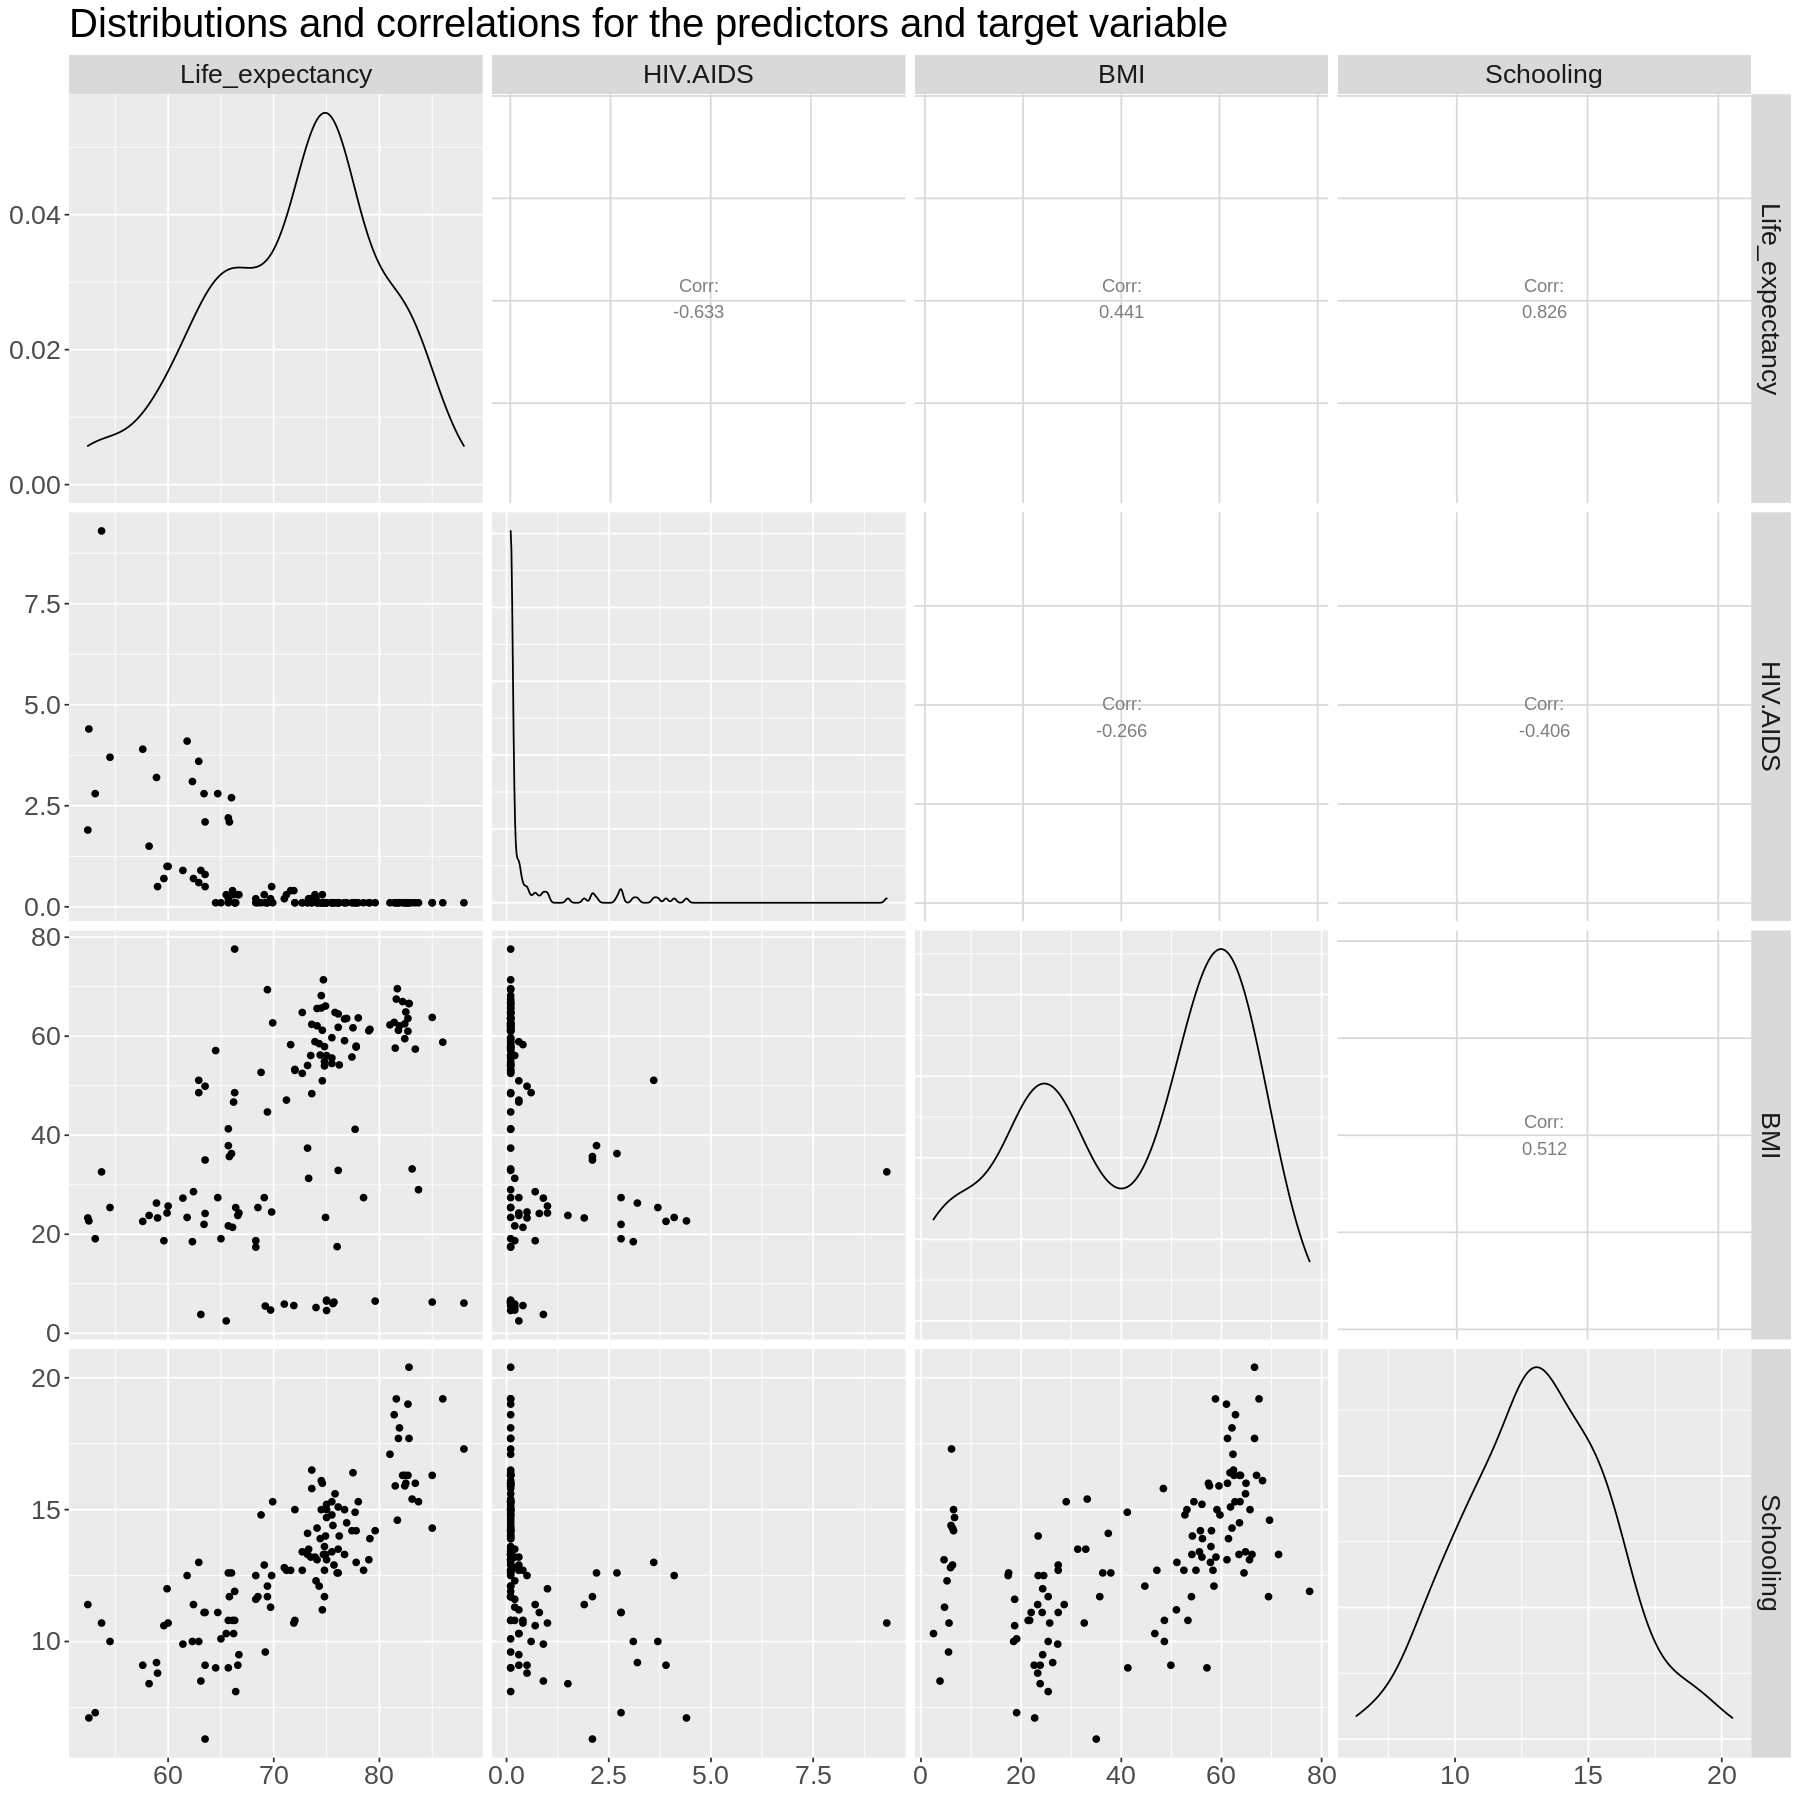

In [26]:
### Correlation Coefficient between the predictors and the target variable

library(GGally)
options(repr.plot.width = 15, repr.plot.height = 15)
who_ggpairs <- ggpairs(life_expectancy_training) +
                ggtitle("Distributions and correlations for the predictors and target variable") +
                theme(text = element_text(size = 20))
who_ggpairs

Figure 2. Correlation and distribution of the predictors, BMI, schooling, and HIV deaths; and the target variable, life expectancy.

#### K-nearest neighbors

After setting the seed number we preprocessed the training set by scaling and centering it. Following this we created the model specification for k-nearest neighbors regression by tuning neighbors, then performed a cross-validation with 5 folds using vfold_cv.
We then tuned our workflow, testing values from 1 to 50, and resampled using our cross-validation data set. We then found the minimum RMSPE to determine our best K value.

In [19]:
### Model Tuning and 5-fold Cross Validation

set.seed(3548)
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
        set_engine("kknn")%>%
        set_mode("regression")

life_recipe <- recipe(Life_expectancy ~ ., data = life_expectancy_training) %>% 
            step_scale(all_predictors()) %>% 
            step_center(all_predictors())

life_vfold <- vfold_cv(life_expectancy_training, v = 5, strata = "Life_expectancy")


life_fit <- workflow() %>%
        add_recipe(life_recipe) %>%
        add_model(knn_tune) 
life_fit

#Tuning the workflow

gridvals <- tibble(neighbors = seq(from = 1, to = 50))

life_results <- life_fit %>%
      tune_grid(resamples = life_vfold, grid = gridvals) %>%
      collect_metrics() 
life_results


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,4.1248631,5,0.29376019,Model01
1,rsq,standard,0.7446051,5,0.03121464,Model01
2,rmse,standard,3.8457647,5,0.14064886,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,rsq,standard,0.6687096,5,0.05624965,Model49
50,rmse,standard,5.3941531,5,0.35542238,Model50
50,rsq,standard,0.6633212,5,0.05698547,Model50


In [20]:
# finding the minimum RMSPE to help pick number of neighbors that will serve as our best k value

life_min <- life_results %>%
   filter(.metric == "rmse") %>%
   arrange(mean) %>% 
   slice(1)

life_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,rmse,standard,3.669756,5,0.1169645,Model03


Using 3 as our best K value, we then re-trained our K-NN regression model on the training data set and used it to predict the life expectancy of our test data. 

In [21]:
### Creating final regression model and Model Evaluation

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
        set_engine("kknn")%>%
        set_mode("regression")

life_fit_2 <- workflow() %>%
            add_recipe(life_recipe) %>%
            add_model(knn_spec) %>%
            fit(life_expectancy_training)

knn_rmspe <- life_fit_2 %>%
            predict(life_expectancy_testing)%>%
            bind_cols(life_expectancy_testing) %>%
            metrics(truth = "Life_expectancy", estimate = .pred) %>%
            filter(.metric == "rmse")
knn_rmspe

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.762808


Table 4. Our rmspe shows that our life expectancy can be expected to predict the life expectancy of a patient within ±3.76 years.

### Discussion

- The predictor with the strongest correlation to the target variable was Schooling, followed by HIV deaths. 

- BMI had the lowest correlation to life expectancy. This could be due to the wide range of individuals obesity affects. Obesity is often associated with wealthier countries, however due to a lack of proper nutrition obesity and the many chronic diseases it has been linked to, such as diabetes and cardiovascular disease, has been rising in less developed countries. As obesity affects those from all socioeconomic backgrounds it is a weaker predictor than Schooling and HIV deaths.

- The root mean squared prediction error showed that our model can be expected to predict the life expectancy of a given patient with an accuracy of ±3.76 years.

- The positive relationship found between schooling and life expectancy, and the negative relationship with both the BMI and mortality predictors and life expectancy, were what we expected.

- Knowing that Schooling and HIV deaths had the greatest impact on increasing life expectancy means that countries should consider investing in healthcare and education in order to increase life expectancy for their citizens. 

- Understanding what factors affect life expectancy also enables individuals to make decisions in their spending and political affiliations that could improve their own outcomes.

- Further questions which could be investigated include looking at whether average population density negatively or positively affects life expectancy, and how much having health insurance improves life expectancy. It would also be interesting to explore whether there is a significant difference in life expectancy predictions between sexes. 

## References

Crimmins E. M. (2015). Lifespan and Healthspan: Past, Present, and Promise. _The Gerontologist,_ 55(6), 901–911. https://doi.org/10.1093/geront/gnv130

Novak, A., Čepar, Z., and Trunk, A. (2016). The role of expected years of schooling among life expectancy determinants. _International Journal of Innovation and Learning_. 20(1). https://www.inderscienceonline.com/doi/pdf/10.1504/IJIL.2016.076673